# Recognising NRs


In [1]:
import sys
import os
basef = "/mnt/data/Anastasia/"
wdirs = ["/mnt/data/Anastasia/Glass"]

dfiles = []
for dirt in wdirs:
    basedir = dirt
    files = os.listdir(basedir)
    if dirt[-1] != '/':
        dirt = dirt+'/'
    for f in files:
        if f[-4:]=='.tif': 
            try:
                i = int(f[-5])
                dfiles.append(dirt+f)
            except:
                pass

            
     
               
  
            
#dfiles = dfiles[4:8]

print(len(dfiles))
print(dfiles)


4
['/mnt/data/Anastasia/Glass/field1_2.tif', '/mnt/data/Anastasia/Glass/cellX_1.tif', '/mnt/data/Anastasia/Glass/field2_4.tif', '/mnt/data/Anastasia/Glass/field3_6.tif']


In [2]:
sys.path.append("/export/home1/users/bssn/serna/GitIBENS/Nanorods")

In [3]:
from numpy import *
from matplotlib.pylab import *
import scipy.optimize as opt
import pickle
from scipy.optimize import minimize,least_squares
from scipy.stats import linregress

%matplotlib inline

In [4]:
from signal_analysis.core import dblgausfit,dblgaussd

In [5]:
def bimod(x):
    m1 = mean(x)
    m2 = std(x)
    m3 = mean((x-m1)**3)/m2**3
    m4 = mean((x-m1)**4)/m2**4
    return((m3**2+1)/m4)

In [6]:
import seaborn as sns
sns.set(style="white", color_codes=True)

In [7]:
#with open('/mnt/data/Anastasia/RecognisingNRs_allcells.pkl','rb') as f:
#    imsk,nwdirs,dfilesF,dgps,ampst,idx0,xds,xde,xden,Des,Dep = pickle.load(f)

with open('/mnt/data/Anastasia/glass_statsB.pkl','rb') as f:
    imsk,nwdirs,dgps,ampst,idx0,xds,xde,xden,Des,Dep,tmark = pickle.load(f)


(8856,)


Text(0,0.5,'p_1')

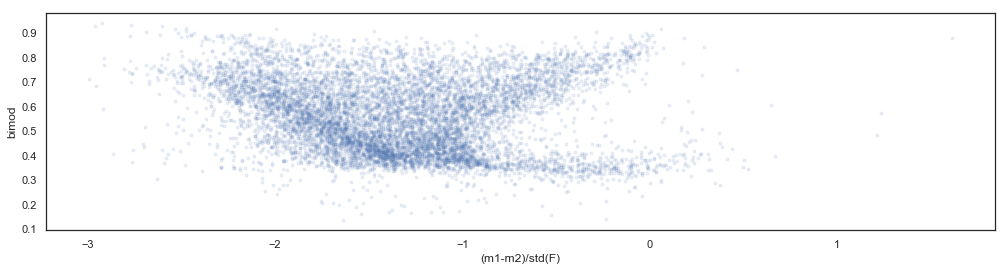

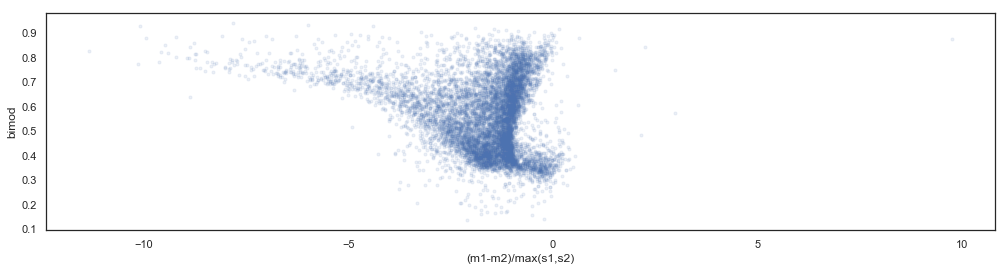

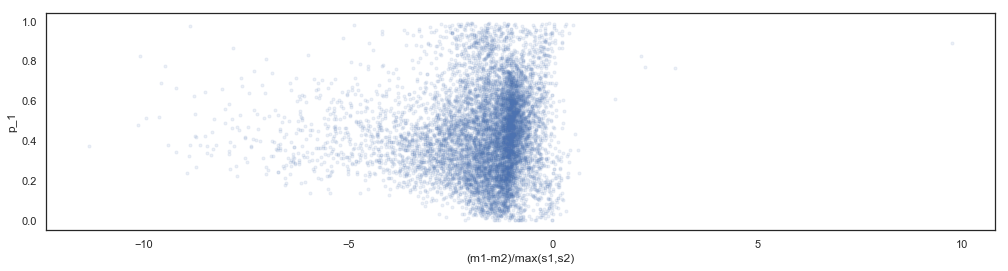

In [8]:
sel = (abs(dgps[:,3]-dgps[:,5])<3)*(dgps[:,2]>0)*(dgps[:,2]<1)
figure(figsize=(17,4))
plot(dgps[sel,3]-dgps[sel,5],ampst[sel,2],'.',alpha=0.1)
xlabel("(m1-m2)/std(F)")
ylabel("bimod")
figure(figsize=(17,4))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
#s1 = column_stack((dgps[sel,6],dgps[sel,4])).sum(axis=1)

xt = (dgps[:,3]-dgps[:,5])/s1
sel = (abs(dgps[:,3]-dgps[:,5])<3)*(dgps[:,2]>0)*(dgps[:,2]<1)*(abs(xt)<20)
print(s1.shape)
plot(xt[sel],ampst[sel,2],'.',alpha=0.1)
xlabel("(m1-m2)/max(s1,s2)")
ylabel("bimod")
figure(figsize=(17,4))
plot(xt[sel],dgps[sel,2],'.',alpha=0.1)
xlabel("(m1-m2)/max(s1,s2)")
ylabel("p_1")

In [9]:
def conditionnumber(a,D,dG = None):
    if dG is not None:
        if dG >4:
            return(7)
    if a<0.1:
        return(0)
    if a>0.1 and a<0.4:
        return(1)
    if a>0.4 and a<1.0 and D<1e-2:
        return(2)
    if a>1.0 and a<3.0 and D>1e-2:
        return(3)
    if a>1.0 and a<3.0 and D<1e-2:
        return(4)
    if a>3.0:
        return(5)
    return(6)


def conditionlabel(i):
    if i==0:
        return("Amp/Bg<0.1")
    if i==1:
        return("0.1< Amp/Bg <0.4")
    if i==2:
        return("0.4< Amp/Bg <1.0 & D0<0.01 um2/s")
    if i==3:
        return("1< Amp/Bg <3 & D0>0.01 um2/s")
    if i==4:
        return("1< Amp/Bg <3 & D0<0.01 um2/s")
    if i==5:
        return("Amp/Bg>3")
    if i==6:
        return("Others")
    if i==7:
        return("Sharp Nanorod")


#sel = (ampst[:,0]/ampst[:,1]>0.1)*(ampst[:,0]/ampst[:,1]<0.4)
#sel = (ampst[:,0]/ampst[:,1]>0.4)*(ampst[:,0]/ampst[:,1]<1.0)*(Des[:,0]<1e-2)
#sel = (ampst[:,0]/ampst[:,1]>1.0)*(ampst[:,0]/ampst[:,1]<3.0)*(Des[:,0]>1e-2)
#sel = (ampst[:,0]/ampst[:,1]>1.0)*(ampst[:,0]/ampst[:,1]<3.0)*(Des[:,0]<1e-2)
#sel0 = (ampst[:,0]/ampst[:,1]>3.0)
#conditionnumber(0.5,0.6)

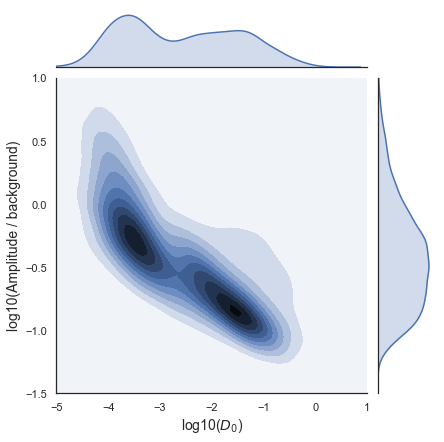

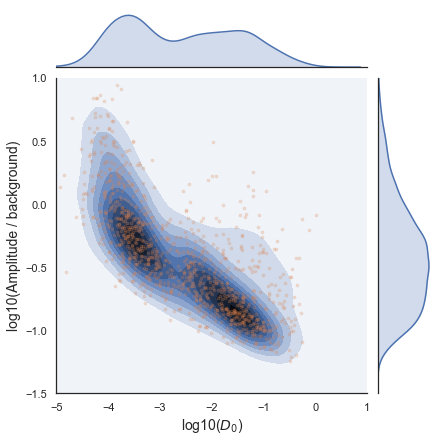

In [10]:
yt = ampst[:,0]/ampst[:,1]
xt = Des[:,0]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = log10(yt[sel])
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)
#g.x = df2.x2
#g.y = df2.y2
#g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)
#g.x = df2.x2
#g.y = df2.y2

selv = permutation(arange(len(xt)))[:1000]
g.x = xt[selv]
g.y = yt[selv]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

xt = xt[imsk[idx0[sel]] ==1]
yt = yt[imsk[idx0[sel]] ==1]
selv = permutation(arange(len(xt)))[:1000]
g.x = xt[selv]
g.y = yt[selv]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


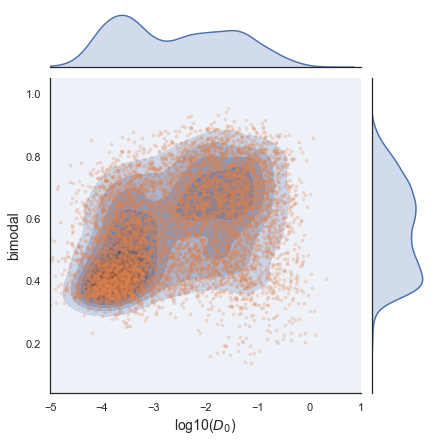

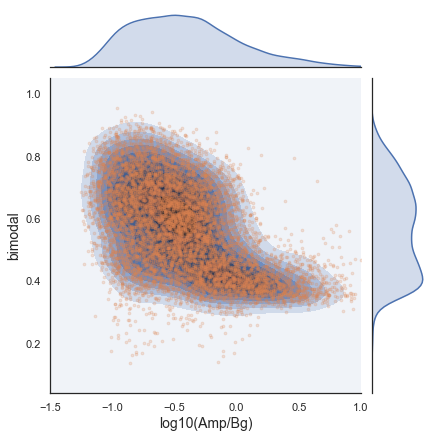

In [11]:
yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = yt[sel] #log10(yt[sel])
g = sns.jointplot(x=xt, y=yt, kind='kde')

#g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)
#g.x = df2.x2
#g.y = df2.y2
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)

yt = ampst[:,2]
xt = ampst[:,0]/ampst[:,1]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = yt[sel] #log10(yt[sel])
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-1.5,1.0])
#g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10(Amp/Bg)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)
#g.x = df2.x2
#g.y = df2.y2
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


<Figure size 432x288 with 0 Axes>

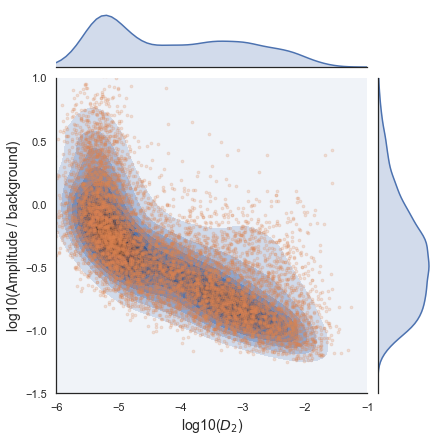

In [12]:
yt = ampst[:,0]/ampst[:,1]
xt = Dep[:,3]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = log10(yt[sel])
fig = figure()
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-6,-1])
g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


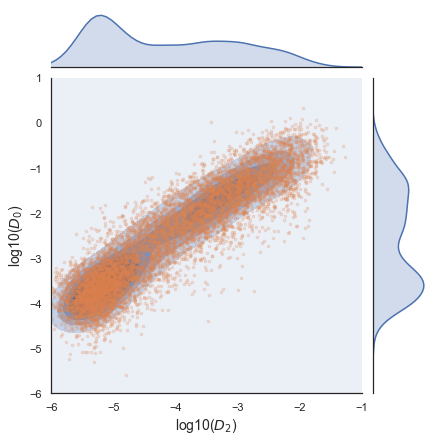

In [13]:
yt = Des[:,0]
xt = Dep[:,3]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = log10(yt[sel])
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-6,1.0])
g.ax_joint.set_xlim([-6,-1])
g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
g.ax_joint.set_ylabel("log10($D_0$)",fontsize=14)
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


In [14]:
dfilesF = []
driftcorrected = True
for i,dirt in enumerate(nwdirs):
    basedir = dirt
    files = os.listdir(basedir)
    dfiles = []
    if driftcorrected:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]=='DC': dfiles.append(basedir+f)
    else:
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]!='DC': dfiles.append(basedir+f)
    dfiles.sort()
    dfilesF.extend(dfiles)
dfiles = dfilesF

In [15]:
yt = 1.0*ampst[:,0]/ampst[:,1]
xt = 1.0*Des[:,0]
sel = (xt>0)*(yt>0)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = log10(yt[sel])


NRs selected:  [1673 6664 3229]


Text(0.5,0,'t')

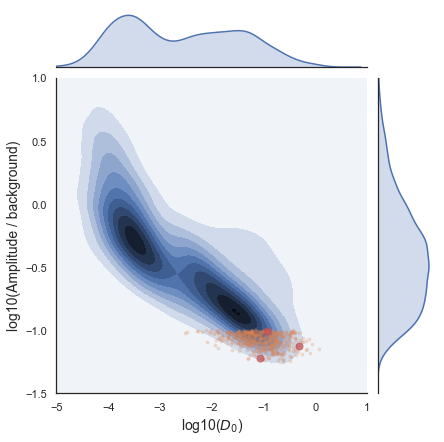

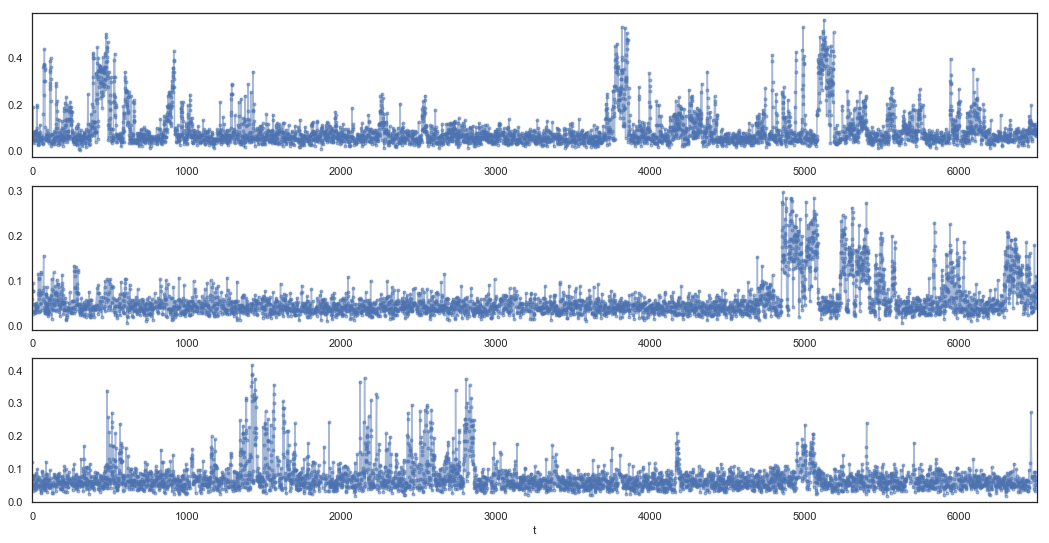

In [16]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = ampst[:,0]/ampst[:,1]<0.1

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)


it = permutation(arange(ampst.shape[0])[sel])[:3]
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)

print('NRs selected: ' ,it)

#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
#fig.title("Amplitude/Background < 0.1")
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [17]:
sel = ampst[:,0]/ampst[:,1]<0.1
it = permutation(arange(len(xt))[sel])[:3]
print(it,idx0[it])

[6534 6613 5056] [6539 6618 5060]


NRs selected:  [4546 4074 2621]


Text(0.5,0,'t')

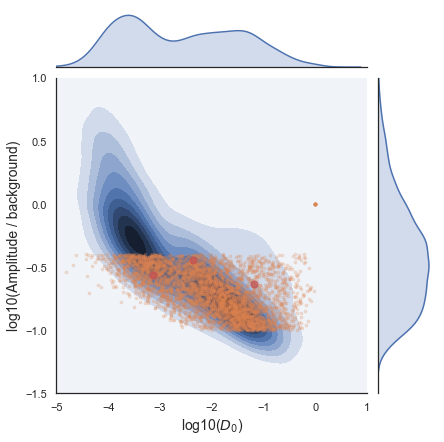

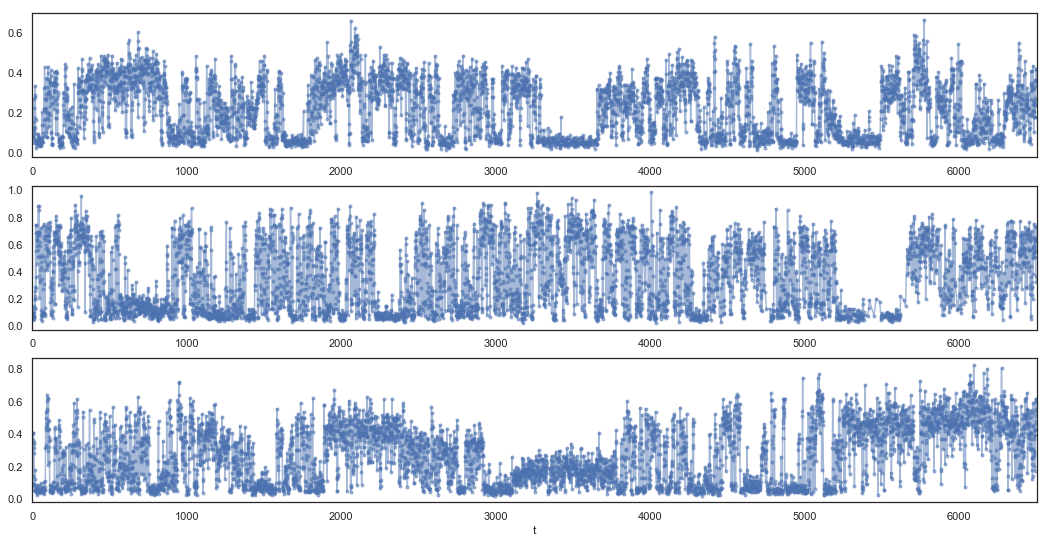

In [18]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>0.1)*(ampst[:,0]/ampst[:,1]<0.4)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)

print('NRs selected: ' ,it)
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [3656 2158 3470]


Text(0.5,0,'t')

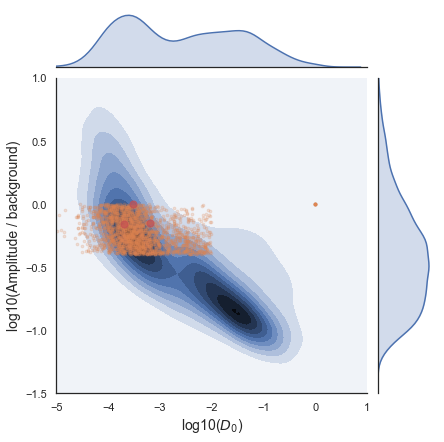

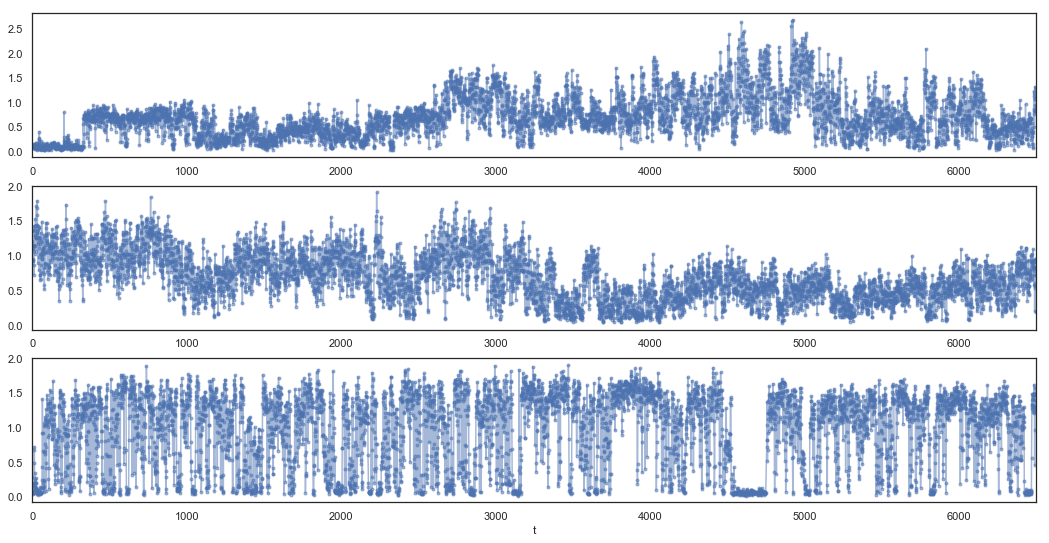

In [19]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>0.4)*(ampst[:,0]/ampst[:,1]<1.0)*(Des[:,0]<1e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)
it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)

fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [3408 5450 6855]


Text(0.5,0,'t')

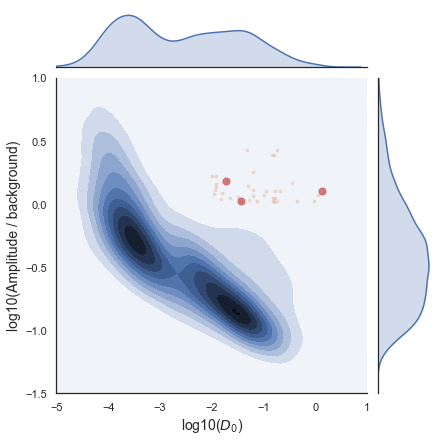

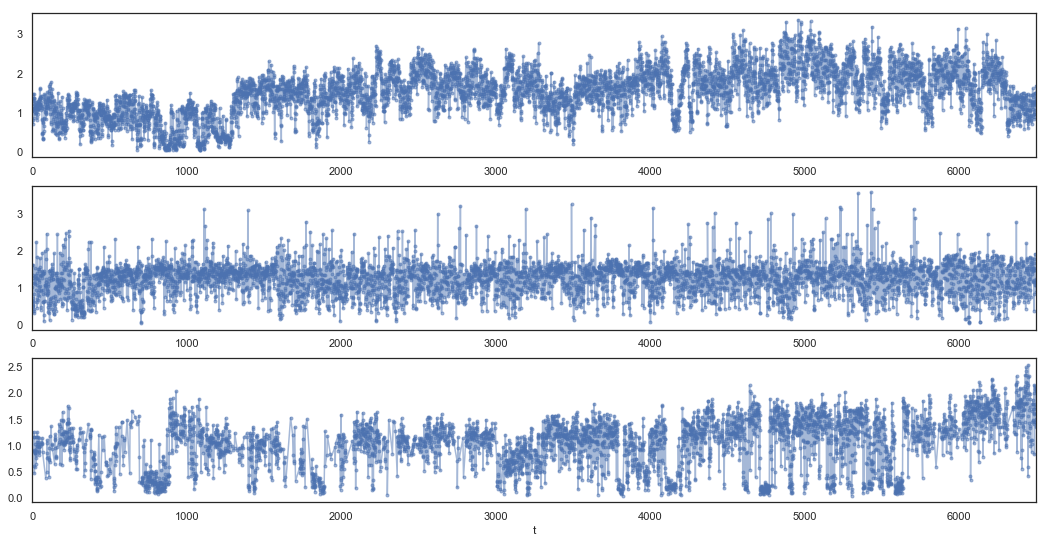

In [20]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>1.0)*(ampst[:,0]/ampst[:,1]<3.0)*(Des[:,0]>1e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)
it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [5317 3506 3416]


Text(0.5,0,'t')

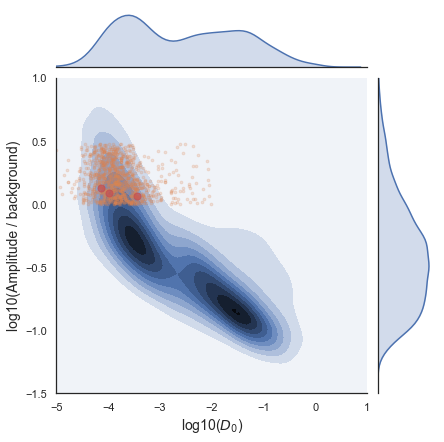

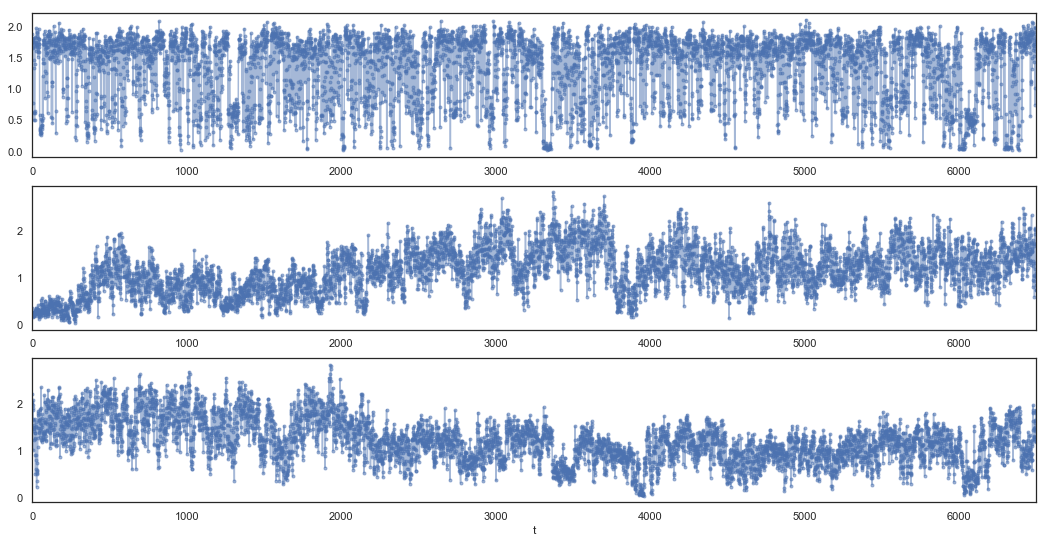

In [21]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>1.0)*(ampst[:,0]/ampst[:,1]<3.0)*(Des[:,0]<1e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
#fig = figure(figsize=(14,8))
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
print('NRs selected: ' ,it)
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [22]:
print(log10(ampst[254,0]/ampst[254,1]),log10(Des[254,0]))

0.07353855473459661 -3.3265165783865434


NRs selected:  [7866 3308 3306]


Text(0.5,0,'t')

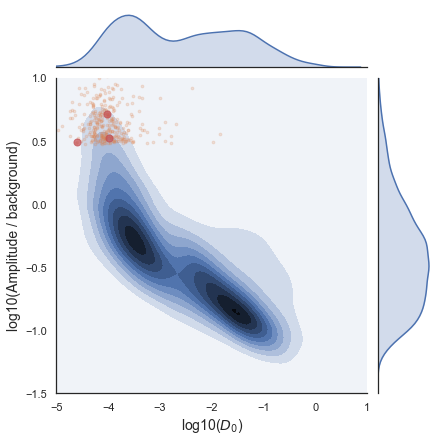

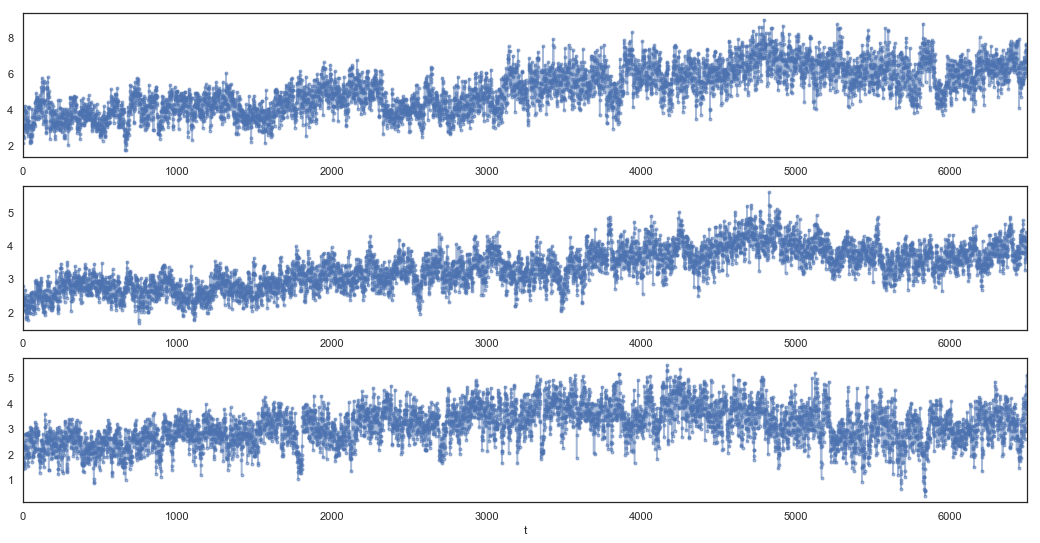

In [23]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_ylim([-1.5,1.0])
g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("log10(Amplitude / background)",fontsize=14)

sel = (ampst[:,0]/ampst[:,1]>3.0)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [24]:
yt = 1.0*ampst[:,2]
xt = ampst[:,0]/ampst[:,1]
sel = (xt>0)*(yt>0)
xt = log10(xt[sel])
yt = yt[sel] #log10(yt[sel])

NRs selected:  [8665 1173  394]


Text(0.5,0,'t')

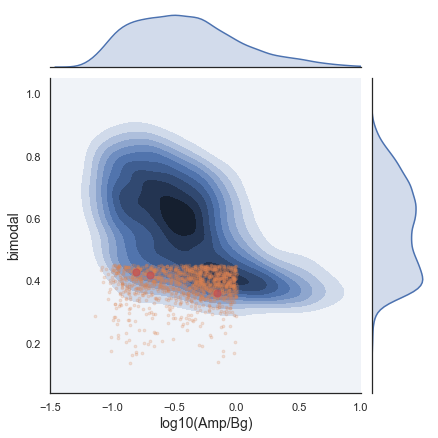

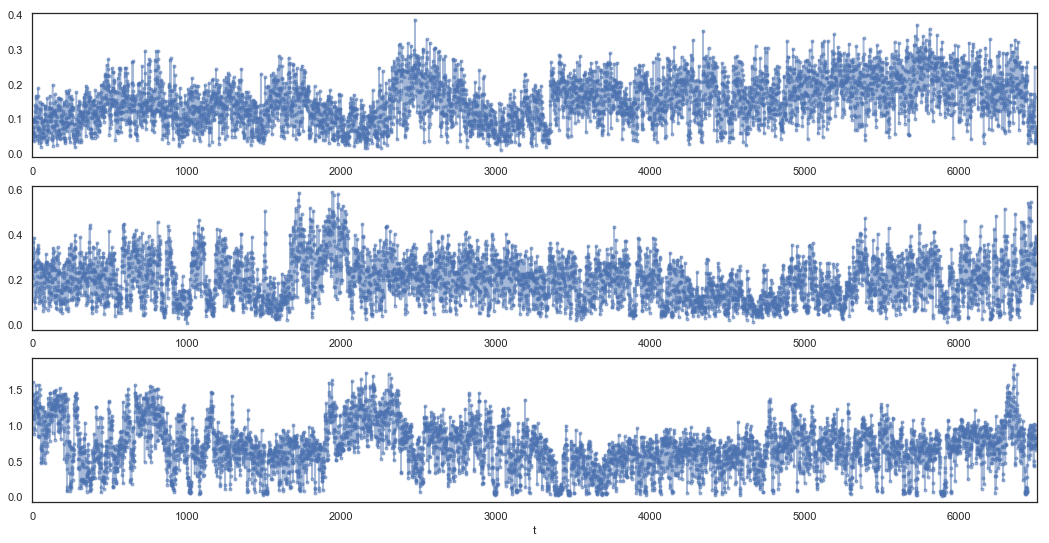

In [25]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-1.5,1.0])
g.ax_joint.set_xlabel("log10(Amp/Bg)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)

sel = (ampst[:,2]<0.45)*(ampst[:,0]/ampst[:,1]<1.0)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [26]:
yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(yt>0)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])

In [27]:
%matplotlib inline

NRs selected:  [1946 3532 1785]


Text(0.5,0,'t')

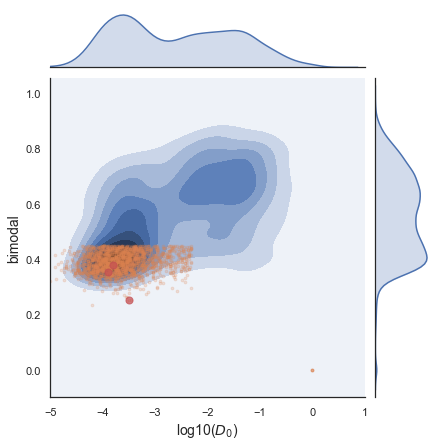

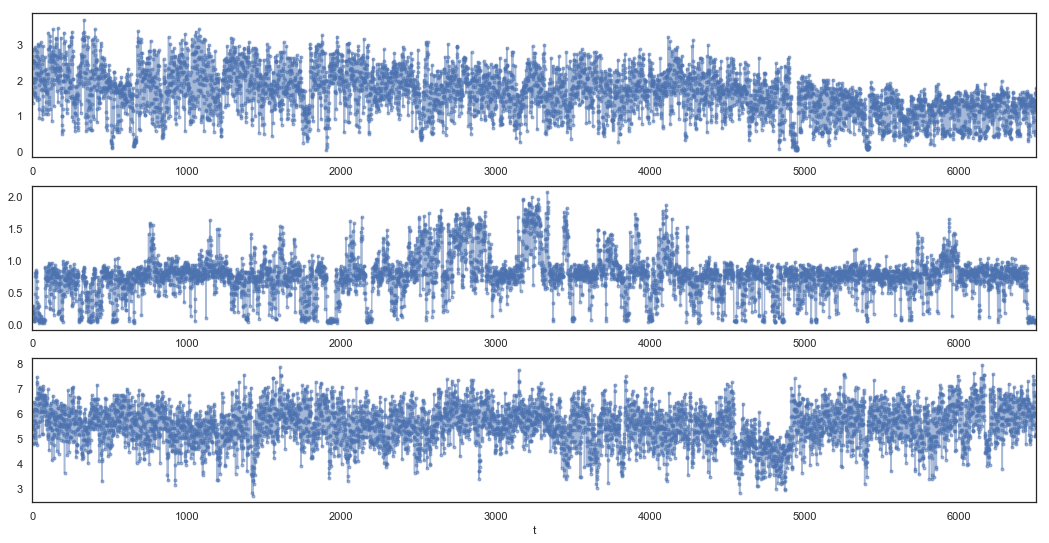

In [28]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)

sel = (ampst[:,2]<0.45)*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [29]:
yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(yt>0)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])

In [30]:
%matplotlib inline

NRs selected:  [4374 1226 7419]


Text(0.5,0,'t')

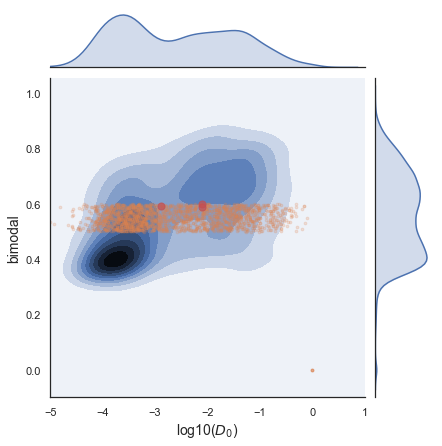

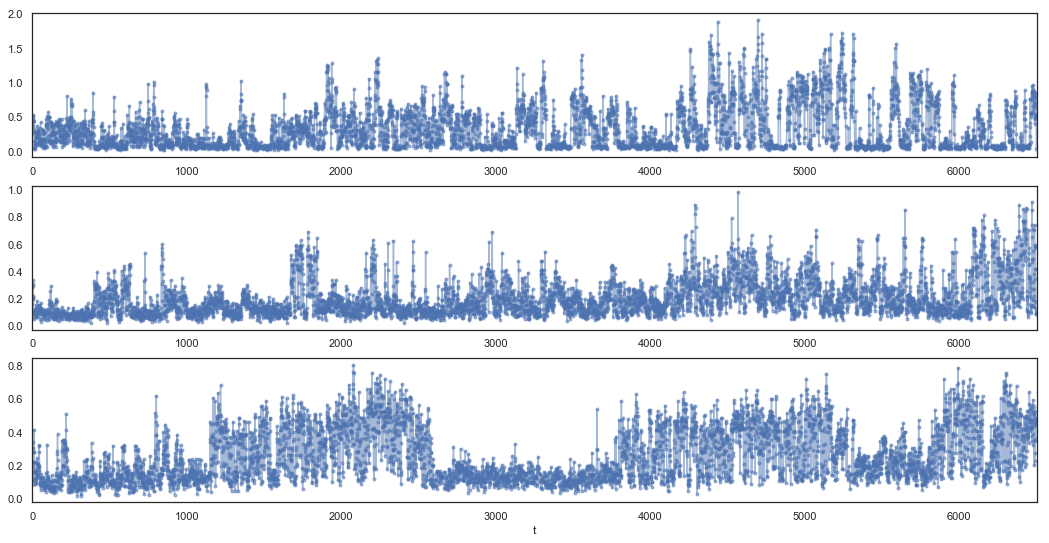

In [31]:
g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("bimodal",fontsize=14)

sel = (ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [32]:
%matplotlib inline

NRs selected:  [3164 2418 1177]
-2.8506017250529387


Text(0.5,0,'t')

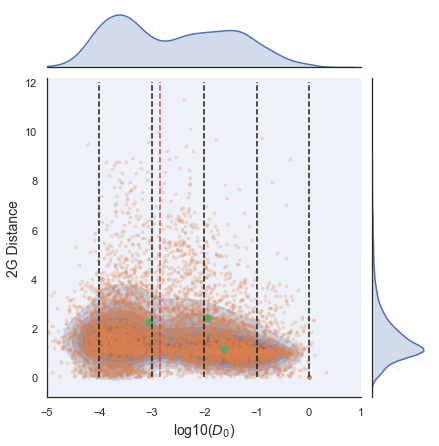

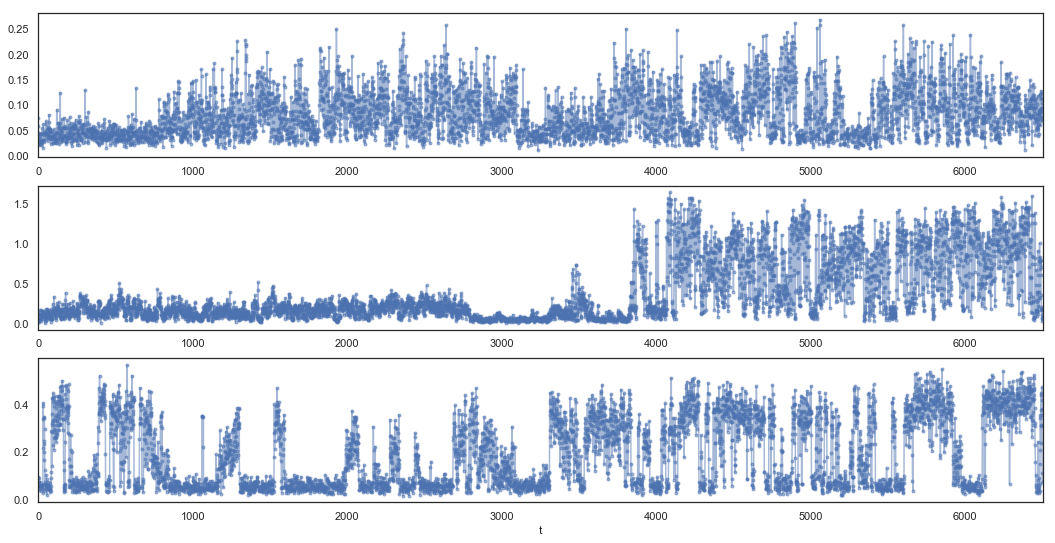

In [33]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C2', s=50,alpha=0.9)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
plot([0,0],[0,12],'k--')
plot([-1,-1],[0,12],'k--')
plot([-2,-2],[0,12],'k--')
plot([-3,-3],[0,12],'k--')
plot([-4,-4],[0,12],'k--')
plot([-5,-5],[0,12],'k--')
#xt = xt[imsk[idx0[sel]] ==1]
#yt = yt[imsk[idx0[sel]] ==1]
newsel = yt>3.0
plot([mean(xt[newsel]),mean(xt[newsel])],[0,12],'r--')
print(mean(xt[newsel]))
#g.plot_joint([-3,-3],[0,12],'k--')
#g.plot_joint([-4,-4],[0,12],'k--')
#g.plot_joint([-5,-5],[0,12],'k--')
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")


(array([0.01355824, 0.00677912, 0.02711649, 0.04067473, 0.08134947,
        0.13558244, 0.35929348, 0.40674733, 0.55588802, 0.52199241,
        0.49487592, 0.3660726 , 0.33217699, 0.25082752, 0.33895611,
        0.32539786, 0.44742206, 0.41352645, 0.26438576, 0.28472313,
        0.19659454, 0.14914069, 0.10168683, 0.1220242 , 0.10168683,
        0.04067473, 0.03389561, 0.04745386, 0.03389561, 0.04745386,
        0.02033737]),
 array([-4.92709026, -4.77470212, -4.62231397, -4.46992583, -4.31753768,
        -4.16514954, -4.01276139, -3.86037325, -3.70798511, -3.55559696,
        -3.40320882, -3.25082067, -3.09843253, -2.94604438, -2.79365624,
        -2.64126809, -2.48887995, -2.3364918 , -2.18410366, -2.03171551,
        -1.87932737, -1.72693922, -1.57455108, -1.42216293, -1.26977479,
        -1.11738664, -0.9649985 , -0.81261035, -0.66022221, -0.50783406,
        -0.35544592, -0.20305777]),
 <a list of 31 Patch objects>)

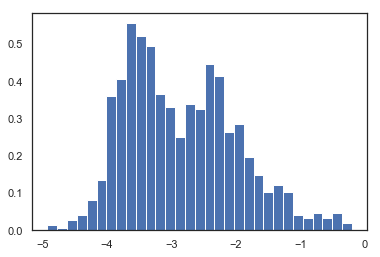

In [34]:
hist(xt[newsel],31,density = True)

NRs selected:  [1759 2830 6863]
-2.568251809491583


Text(0.5,0,'t')

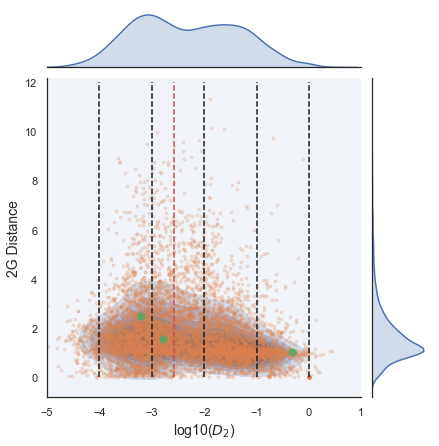

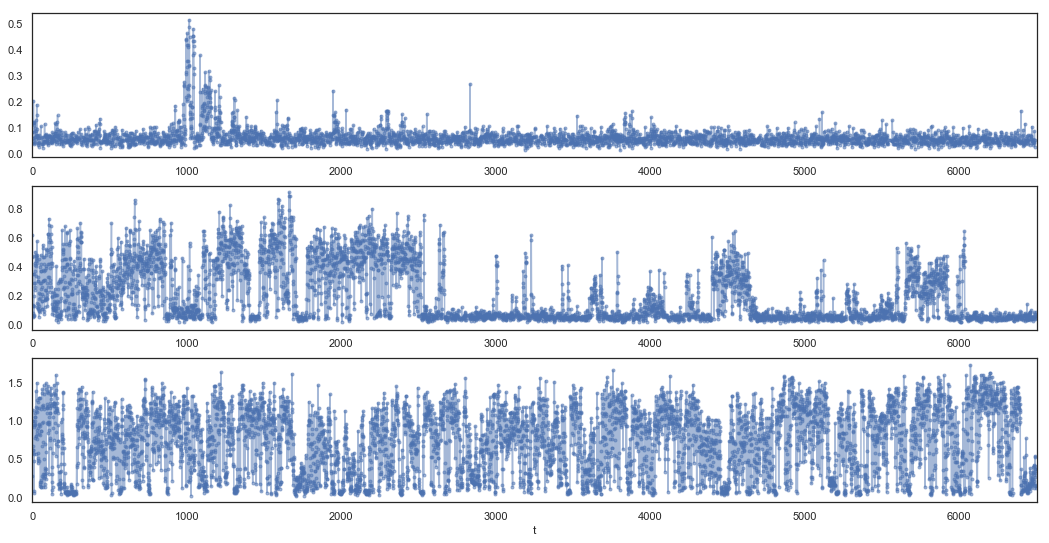

In [35]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt2 = 1.0*Des[:,0]
xt = 1.0*Des[:,2]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
xt2[~sel] = 0

yt[~sel] = 0
xt2[sel] = log10(xt2[sel])
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C2', s=50,alpha=0.9)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
plot([0,0],[0,12],'k--')
plot([-1,-1],[0,12],'k--')
plot([-2,-2],[0,12],'k--')
plot([-3,-3],[0,12],'k--')
plot([-4,-4],[0,12],'k--')
plot([-5,-5],[0,12],'k--')
#xt = xt[imsk[idx0[sel]] ==1]
#yt = yt[imsk[idx0[sel]] ==1]
newsel = yt>3.0
plot([mean(xt[newsel]),mean(xt[newsel])],[0,12],'r--')
print(mean(xt[newsel]))
#g.plot_joint([-3,-3],[0,12],'k--')
#g.plot_joint([-4,-4],[0,12],'k--')
#g.plot_joint([-5,-5],[0,12],'k--')
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")


0.23760330578512398
0.762396694214876


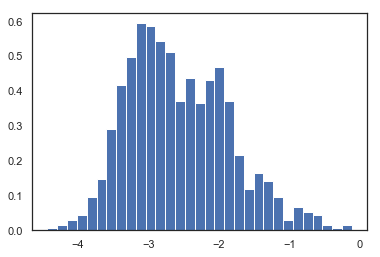

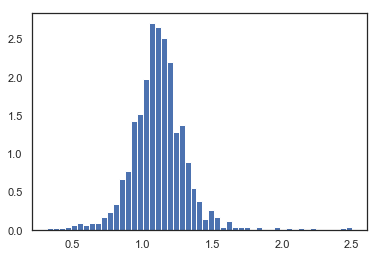

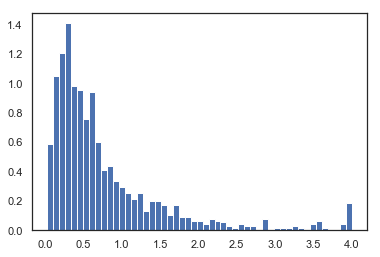

In [36]:
hist(xt[newsel],31,density = True)
figure()
hist(clip(xt2[newsel]/xt[newsel],0,2.5),51,density = True)

print(sum(xt2[newsel]/xt[newsel]<1.0)/newsel.sum())

ratio = 10**(xt2[newsel])/10**(xt[newsel])
#D0/D2
figure()
hist(clip(ratio,0,4),51,density = True)

print(sum(ratio<1.0)/newsel.sum())

In [37]:
mean(ratio),exp(mean(log(ratio)))

(0.8005292033213621, 0.521975458496252)

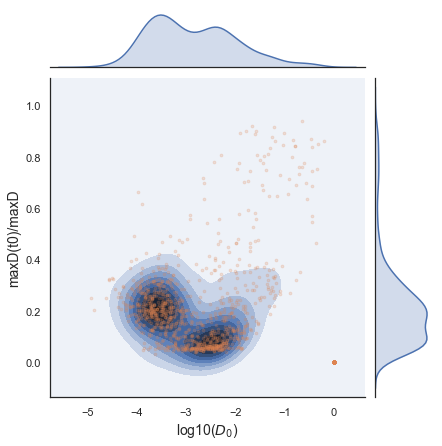

In [53]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
ytp = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,0]/ampst[:,2]
yt = 1.0*sqrt(tmark[:,2]/tmark[:,0])

#xt2 = 1.0*Des[:,0]
xt = 1.0*Des[:,0]#/Des[:,2]

sel = (xt>0)*(abs(ytp)<20)*(abs(ytp)>3.0)
#sel = (xt>0)
xt[~sel] = 0
xt2[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
#xt2[sel] = log10(xt2[sel])
#yt[sel] = log10(yt[sel])


g = sns.jointplot(x=xt[sel], y=yt[sel], kind='kde')

#g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("maxD(t0)/maxD",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)


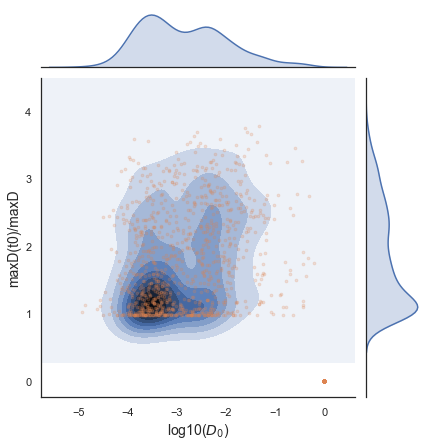

In [63]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
ytp = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,0]/ampst[:,2]
yt = 1.0*sqrt(tmark[:,1]/tmark[:,0])
yt = log10(1.0*tmark[:,5])

#xt2 = 1.0*Des[:,0]
xt = 1.0*Des[:,0]#/Des[:,2]

sel = (xt>0)*(abs(ytp)<20)*(abs(ytp)>3.0)*isfinite(yt)
#sel = (xt>0)
xt[~sel] = 0
xt2[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
#xt2[sel] = log10(xt2[sel])
#yt[sel] = log10(yt[sel])


g = sns.jointplot(x=xt[sel], y=yt[sel], kind='kde')

#g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("maxD(t0)/maxD",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)


KeyboardInterrupt: 

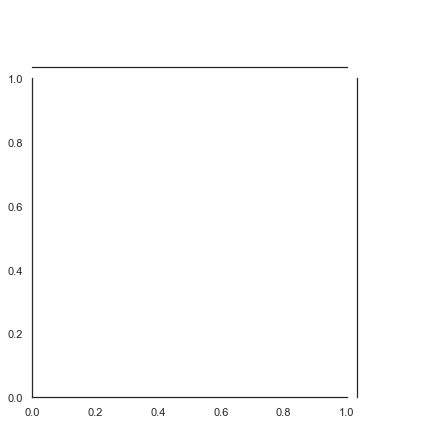

In [87]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Dep[:,3]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-6.5,0])
g.ax_joint.set_xlabel("log10($D_2$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)

s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Dep[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-6.5,0])
g.ax_joint.set_xlabel("log10($D_1$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

g.x =  xt[imsk[idx0[sel]] ==1]
g.y = yt[imsk[idx0[sel]] ==1]
g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C2', s=50,alpha=0.9)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [2521 7200 4506]


Text(0.5,0,'t')

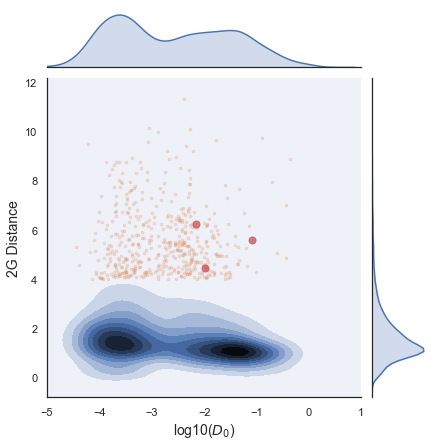

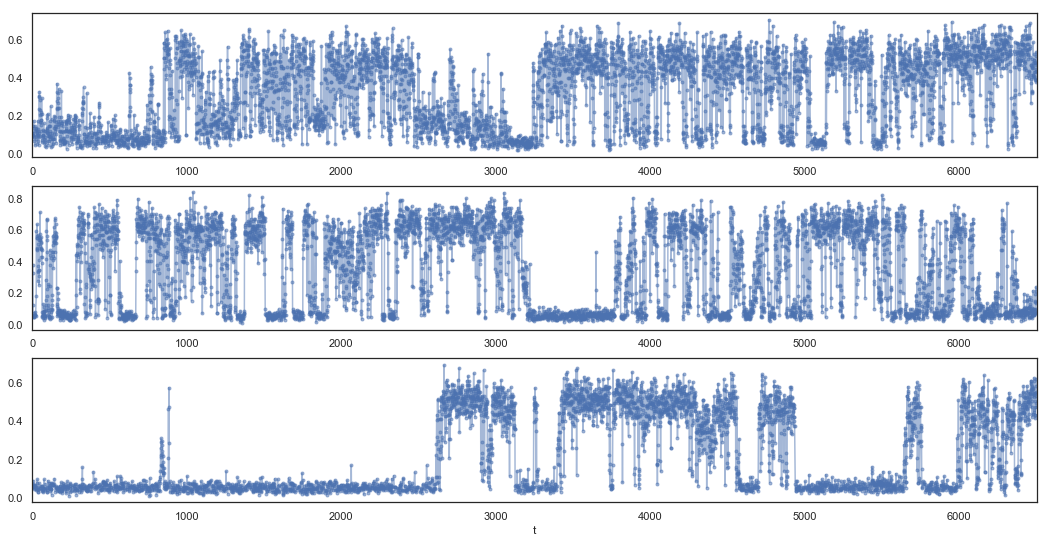

In [36]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = yt>4#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

In [37]:
dgps.shape

(8856, 8)

NRs selected:  [1484 8726 2883]


Text(0.5,0,'t')

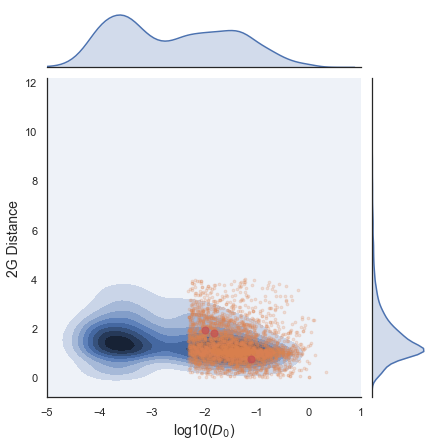

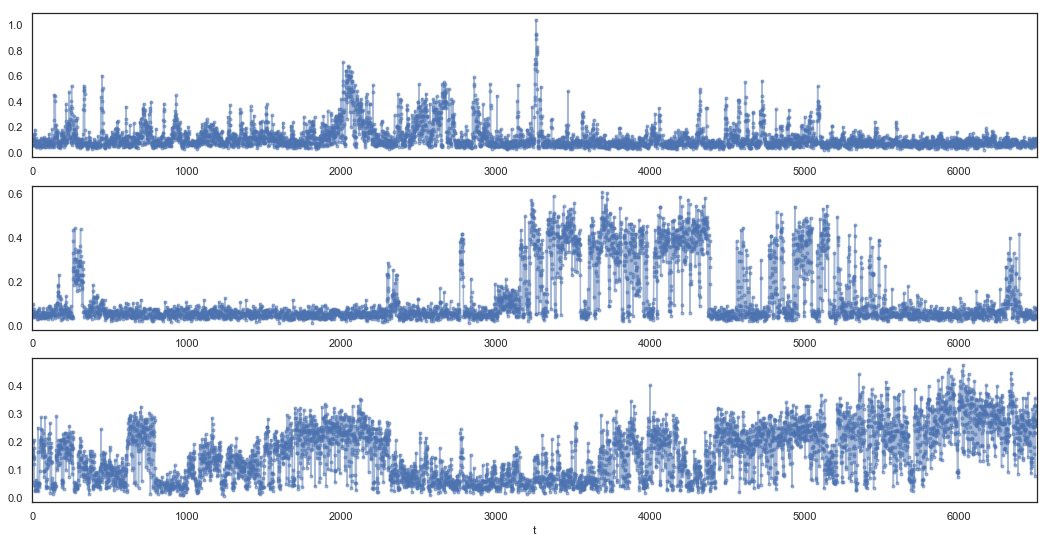

In [38]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = (yt<4)*(Des[:,0]>.50e-2)#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [4624 2362 8148]


Text(0.5,0,'t')

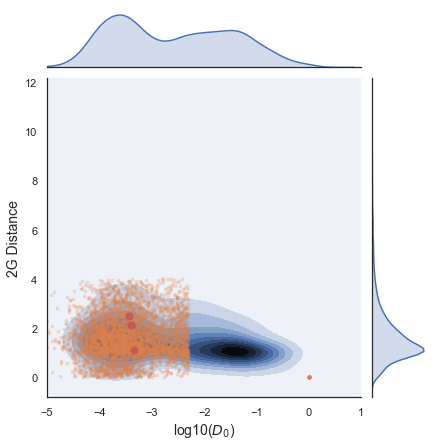

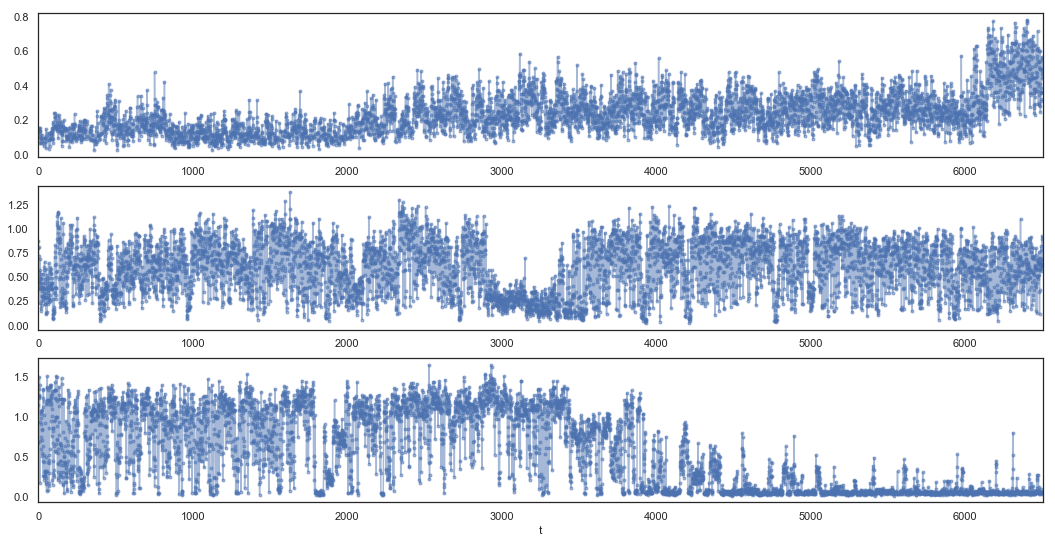

In [39]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = (yt<4)*(Des[:,0]<.50e-2)#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

NRs selected:  [7969 4510 2488]


Text(0.5,0,'t')

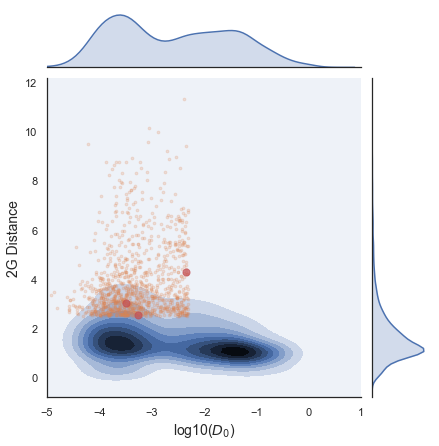

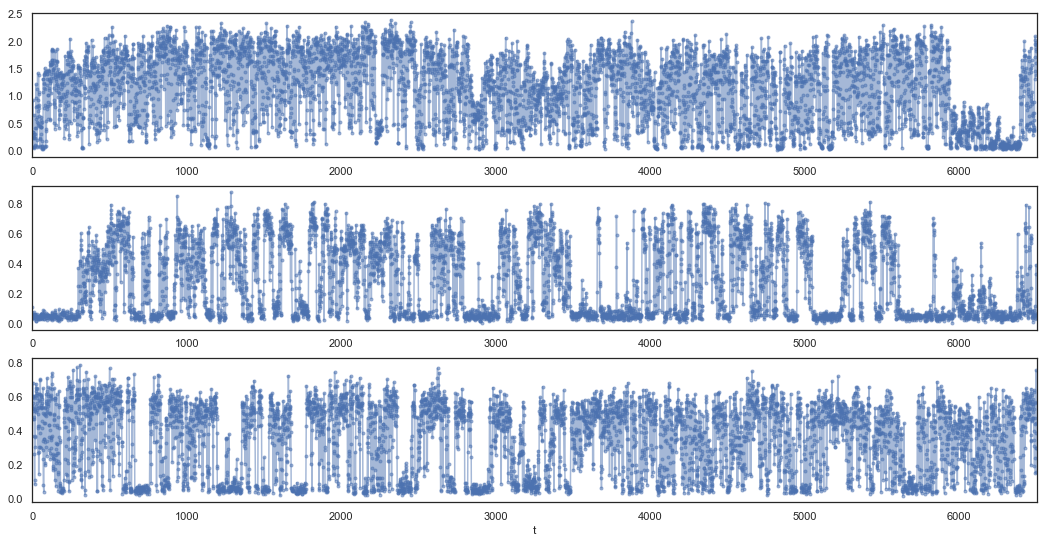

In [40]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])


g = sns.jointplot(x=xt, y=yt, kind='kde')

g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("log10($D_0$)",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = (yt>2.5)*(Des[:,0]<.50e-2)#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C3', s=50,alpha=0.7)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")

[6.29562464 3.05200565 3.56640884] 706


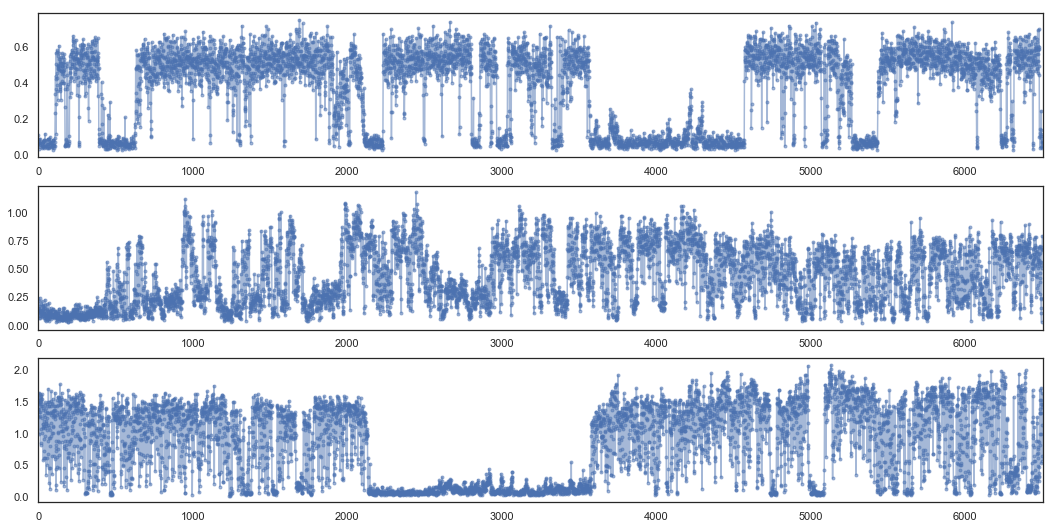

In [41]:
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
#yt = 1.0*ampst[:,2]
xt = 1.0*Des[:,0]
sel = (xt>0)*(abs(yt)<20)
xt[~sel] = 0
yt[~sel] = 0
xt[sel] = log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])

sel = (yt>3.0)*(Des[:,0]<.50e-2)#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

it = permutation(arange(ampst.shape[0])[sel])[:3]

print(yt[it],sel.sum())

fig, ax = subplots(nrows=3,figsize=(18,9))
for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

In [42]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
yt = abs((dgps[:,3]-dgps[:,5])/s1)
zt = 1.0*ampst[:,2]
at = ampst[:,0]/ampst[:,1]
at2 = (dgps[:,0]+dgps[:,1]*column_stack((dgps[:,3],dgps[:,5])).max(axis=1))/ampst[:,1]
xt = 1.0*Des[:,0]
xt2 = Dep[:,0]
xt3 = Dep[:,3]
sel = (xt>0)*(xt2>0)*(xt3>0)*(zt>0)*(abs(yt)<20)
xt = log10(xt[sel])
xt2 = log10(xt2[sel])
xt3 = log10(xt3[sel])
yt = yt[sel] #log10(yt[sel])
zt = zt[sel]
at = log10(at[sel])
at2 = log10(at2[sel])
#  (m1-m2)/max(s1,s2), bimod, A/bg, A_on/bg, D0, D1, D2
data = column_stack((yt,zt,at,at2,xt,xt2,xt3))
savetxt('stats_glass_temp.dat',data,header='#  (m1-m2)/max(s1,s2), bimod, A/bg, A_on/bg, D0, D1, D2')

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10


3.3450946239988864 5.994238274496419
NRs selected:  [1161 6126 7214]


Text(0.5,0,'t')

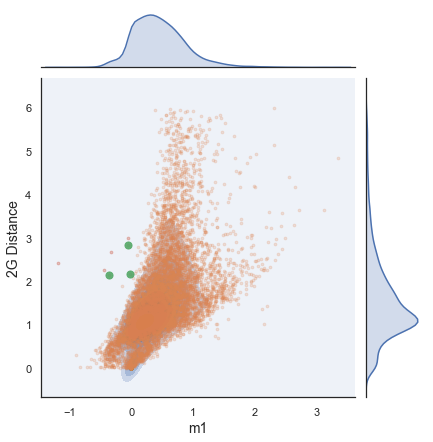

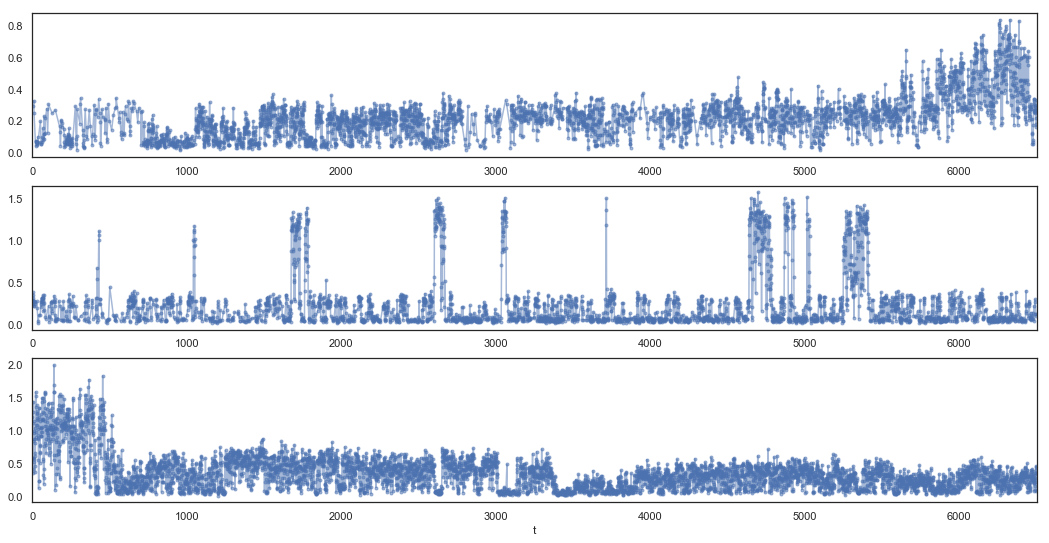

In [43]:
#sel = (abs(dgps[:,3]-dgps[:,5])<3))
s1 = column_stack((dgps[:,6],dgps[:,4])).max(axis=1)
xt = abs((dgps[:,3]-dgps[:,5])/s1)

yt = dgps[:,array([3,5])].max(axis=1)
xta2 = dgps[:,array([3,5])].min(axis=1)

#yt = 1.0*ampst[:,2]
xta = 1.0*Des[:,0]
sel = (xta>0)*(abs(yt)<5)*(xt<6)
xt[~sel] = 0
yt[~sel] = 0
xta2[~sel] = 0
xt[sel] = xt[sel]#log10(xt[sel])
yt[sel] = yt[sel] #log10(yt[sel])
xta2[sel] = xta2[sel]
tt = xt
xt = yt
yt = tt
print(max(xt),max(yt))
g = sns.jointplot(x=xt, y=yt, kind='kde')

#g.ax_joint.set_xlim([-5,1])
g.ax_joint.set_xlabel("m1",fontsize=14)
g.ax_joint.set_ylabel("2G Distance",fontsize=14)

sel = isfinite(ampst[:,2])#(ampst[:,2]>0.5)*(ampst[:,2]<0.6)#*(Des[:,0]<.50e-2)

g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C1', s=30,alpha=0.2)

sel = isfinite(ampst[:,2])*(xta2*xt>0)*(yt>2)
g.x = xt[sel]
g.y = yt[sel]
g.plot_joint(plt.scatter, marker='.', c='C3', s=30,alpha=0.2)

#g.x =  xt[imsk[idx0[sel]] ==1]
#g.y = yt[imsk[idx0[sel]] ==1]
#g.plot_joint(plt.scatter, marker='.', c='C3', s=60,alpha=0.7)


it = permutation(arange(ampst.shape[0])[sel])[:3]
print('NRs selected: ' ,it)
g.x = xt[it]
g.y = yt[it]
g.plot_joint(plt.scatter, marker='o', c='C2', s=50,alpha=0.9)#fig = figure(figsize=(14,8))
#fig = figure(figsize=(14,8))
#plot([0,0],[0,3],'k--')
#plot([-1,-1],[0,3],'k--')
#plot([-2,-2],[0,3],'k--')
#plot([-3,-3],[0,3],'k--')
#plot([-4,-4],[0,3],'k--')
#plot([-5,-5],[0,3],'k--')
#xt = xt[imsk[idx0[sel]] ==1]
#yt = yt[imsk[idx0[sel]] ==1]
#newsel = yt>3.0
#plot([mean(xt[newsel]),mean(xt[newsel])],[0,3],'r--')
#print(mean(xt[newsel]))
#g.plot_joint([-3,-3],[0,12],'k--')
#g.plot_joint([-4,-4],[0,12],'k--')
#g.plot_joint([-5,-5],[0,12],'k--')
fig, ax = subplots(nrows=3,figsize=(18,9))

for j,i in enumerate(idx0[it]):
    name = dfiles[i]; popts = load(name); t = arange(popts.shape[0]); posx = popts[:,5]; posy = popts[:,6]; amp = popts[:,0]
    th = 0; th2 = 13.0; sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    ax[j].plot(t[sel],popts[sel,0]/popts[sel,4],'.-',alpha=0.5,label=i)
    ax[j].set_xlim(0,6500)

ax[-1].set_xlabel("t")


In [66]:
xt

array([0., 0., 0., ..., 0., 0., 0.])